# Tarea 2: Machine Learning for Business Intelligence

## Instrucciones

1. Esta tarea es de caracter individual, por lo tanto queda estrictamente prohibida la copia de codigo ajeno.

2. En caso de elaborar su respuesta **basandose** en código ajeno encontrado en la web, debe agradecer al menos citando la referencia.

3. La discusión con compañeros es siempre bienvenida, no obstante cada respuesta debe ser redactada de manera individual.

4. La fecha límite para la entrega de esta tarea queda establecida para el 15/06/2020.

Nota: La resolución de algunos de los ejercicios puede tomar bastante tiempo, así como su ejecución. Por lo tanto se recomienda hacer la tarea con anticipación y evitar riesgos.

## Pregunta 1: Construyendo una red neuronal desde cero

Para este ejercicio construiremos una red neuronal simple desde cero, la entrenaremos y veremos sus resultados. Para esto utilizaremos un dataset de juguete construido a partir de datos que provienen de dos Gaussianas multivariadas. El objetivo es generar un modelo capaz de clasificar entre estas dos Gaussianas.

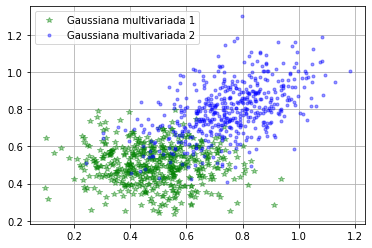

In [362]:
import numpy as np
import matplotlib.pyplot as plt

mean1 = [0.5, 0.5]
cov1 = [[0.02, 0], [0, 0.01]]
x1 = np.random.multivariate_normal(mean1, cov1, 500)
y1 = np.zeros((500,1), dtype='uint')

mean2 = [0.75, 0.8]
cov2 = [[0.02, 0.01], [0.01, 0.02]]
x2 = np.random.multivariate_normal(mean2, cov2, 500)
y2 = np.ones((500,1), dtype='uint')

x, y = np.concatenate((x1, x2), axis=0), np.concatenate((y1, y2), axis=0)

plt.plot(x1[:,0], x1[:,1], '*', label='Gaussiana multivariada 1', c='g', alpha=0.4)
plt.plot(x2[:,0], x2[:,1], '.', label='Gaussiana multivariada 2', c='b', alpha=0.4)
plt.legend()
plt.grid(True)
plt.show()

1.1 En este paso construiremos la red neuronal perceptron multicapa que utilizaremos para clasificar los datos provenientes de las dos Gaussianas multivariadas. Para esto utilizaremos las siguientes especificaciones:
1. Una capa oculta de 8 neuronas y una capa de salida de 1 neurona.
2. Función de activación sigmoide.
3. Función de divergencia de entropía cruzada binaria.


**Hint:**
Existen muchas formas de construir esta red y calcular sus parámetros, pero por simplicidad se sugiere un esquema como el que sigue (puede servir de guía, pero puede programar la red como estime conveniente):

```
class PerceptronMulticapa:
    '''
    primero definir una clase para la red neuronal, la cual recibe como parámetrs las dimensiones de entrada, 
    oculta y salida, asi como el learning rate necesario para la actualización de los parámetros.
    '''
    def __init__(self, inp_dim, hidden_dim, out_dim, lr):
        #definición de los parámetros de la red.
        # W1 = aleatorio
        # W2 = aleatorio
     
    def forward(self, x, y):
        '''
        Acá se calcula el valor predicho por la red, así como los valores intermedios de la capa oculta.
        Se deben tener en cuenta las funciones de activación y de costo. Estas y sus derivadas pueden 
        programarse como funciones aparte.
        '''
        # X^1 = f(W^1X^0)
        # X^2 = f(W^2X^1)
        # Loss(y,X^2)


    def backward(self, x, y):
        '''
        Acá se calculan los nuevos parámetros de la red utilizando el método de backpropagation 
        y gradient descent.
        '''
        # dW2 = Loss' * f(W^2X^1)' * (W^2X^1)'
        # dW1 = ...


        # W2 -= learnng_rate * dW2 
        # W1 -= learnng_rate * dW1
```

(10 pts.)

In [363]:
#Este codigo es aproximadamente un 90% utilizado del codigo entregado por el profesor, en la XOR CLASS

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import os
import logging
os.environ['TF_CPP_MIN_VLOG_LEVEL'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
logging.getLogger("tensorflow").setLevel(logging.WARNING)
import tensorflow as tf
from tensorflow.keras import Sequential
tf.get_logger().setLevel("ERROR")
tf.autograph.set_verbosity(2)
physical_devices = tf.config.experimental.list_physical_devices('GPU')

class PerceptronMulticapa:

    def __init__(self, hidden1_nodes, hidden2_nodes, dim, lr, epochs=5000):
        self.hidden1_nodes = hidden1_nodes #Define la cantidad de nodos de la hidden layer 1
        self.hidden2_nodes = hidden2_nodes #Define la cantidad de nodos de la hidden layer 2
        self.epochs = epochs #Define la cantidad de epochs
        self.lr = lr #Define lr
        samples, features = dim 
        self.theta1 = tf.Variable(tf.random.normal([features+1,self.hidden1_nodes], dtype= tf.float64) ,name = "Theta1") #Inicia matriz de pesos W1 
        self.theta2 = tf.Variable(tf.random.normal([self.hidden1_nodes+1,self.hidden2_nodes], dtype= tf.float64), name = "Theta2") #Inicia matriz de pesos W2 
        
    def __call__(self, x):
        samples = x.shape[0]
        self.bias1 = tf.constant(1, dtype=tf.float64, shape=(samples,1), name='bias1') #Define bias B1
        self.bias2 = tf.constant(1, dtype=tf.float64, shape=(samples,1), name='bias2')
        a0 = tf.concat([self.bias1,x],1, name='a0') #Concatena las datos de entrada con el bias
        z1 = tf.matmul(a0,self.theta1, name='z1') #Multplica la contenación anterior por la matriz de pesos W1
        a1 = tf.concat([self.bias2,tf.sigmoid(z1)],1,name='a1') #Aplica función sigmoide al resultado anterior + bias
        z2 = tf.matmul(a1,self.theta2, name='z2') ##...
        a2 = tf.sigmoid(z2, name='a2')
        return a2
    
    def train(self, inputs, outputs):
        theta1_hist, theta2_hist = [], []
        for epoch in range(self.epochs): 
            learning_rate = self.lr
            with tf.GradientTape() as t: 
                loss = PerceptronMulticapa.loss(outputs, self.predict(inputs))
                accuracy = PerceptronMulticapa.get_accuracy_value(outputs, self.predict(inputs))
            dThe1, dThe2 = t.gradient(loss, [self.theta1, self.theta2])
            self.theta1.assign_sub(learning_rate * dThe1)
            self.theta2.assign_sub(learning_rate * dThe2)
            
            if epoch % 500 == 0:
                theta1_hist.append(self.theta1.numpy())
                theta2_hist.append(self.theta2.numpy())
                print('Epoch %2d: learning_rate=%2.5f, loss=%2.5f, accuracy=%2.5f' % (epoch, learning_rate, loss, accuracy))

    def predict(self, x):
        return self.__call__(x)
  
    @staticmethod
    def get_accuracy_value(target_y, predicted_y):
      predicted_y = PerceptronMulticapa.convert_prob_into_class(predicted_y)
      return (predicted_y == target_y).all(axis=0).mean()

    @staticmethod
    def convert_prob_into_class(probs):
      probs_ = np.copy(probs)
      probs_[probs_ > 0.5] = 1
      probs_[probs_ <= 0.5] = 0
      return probs_  

    @staticmethod
    def loss(target_y, predicted_y):
        return  -tf.reduce_mean(target_y*tf.math.log(predicted_y)+(1-target_y)*tf.math.log(1-predicted_y), axis = 0, name='Cost_function')

1.2 Utilizando los datos proveídos construya los un conjunto de entrenamiento(60%), validación (20%) y test (20%). Asegurese de que al menos en el conjunto de entrenamento los datos se encuentren aleatorizados respecto a su clase. 

(3 pts.)

In [364]:
from sklearn.model_selection import train_test_split
X_train, X_40, y_train, y_40 = train_test_split(x, y, test_size=0.4, random_state = 0)

x_test, y_test = X_40[:200], y_40[:200]
x_val, y_val = X_40[200:], y_40[200:]

1.3 Entrene la red neuronal construida en el primer paso, variando el learning rate en cada entrenamiento. Se pide probar con las siguientes alternativas: [1, 0.1, 0.01, 0.001, 0.0001, 0.00001].
Por cada entrenamiento utilize al menos 300 épocas y muestre la curvas de aprendizaje para accuracy y loss. 
Las curvas deben ser construidas utilizando el conjunto de entrenamiento y de validación.

¿Cuál es la mejor alternativa de learning rate para el problema propuesto? ¿Por qué? 

(7 pts.)

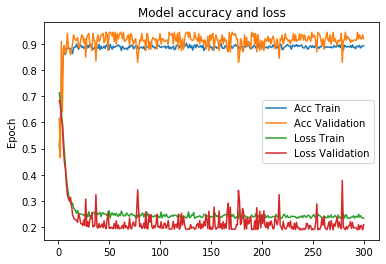

In [365]:
##PRUEBA CON LEARNING RATE 1
model = Sequential()
model.add(Dense(units=8, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.SGD(learning_rate=1), loss = 'binary_crossentropy', metrics=['accuracy'])
graph = model.fit(X_train, y_train, epochs=300, verbose=0, validation_data=(x_val, y_val))


#Para plotear se utilicé el codigo encontrado en el siguiente video
#https://youtu.be/7gGxBGvSAa0?list=PLc2rvfiptPSR3iwFp1VHVJFK4yAMo0wuF&t=2438
epoch_range = range(1,301)
plt.plot(epoch_range, graph.history['accuracy'])
plt.plot(epoch_range, graph.history['val_accuracy'])
plt.plot(epoch_range, graph.history['loss'])
plt.plot(epoch_range, graph.history['val_loss'])
plt.title('Model accuracy and loss')
plt.ylabel('Epoch')
plt.legend(['Acc Train', 'Acc Validation','Loss Train', 'Loss Validation'], loc='right')
plt.show()

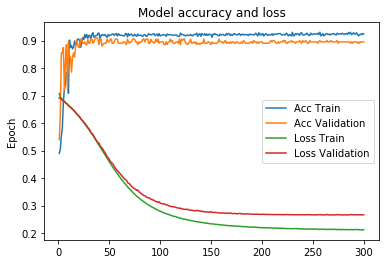

In [273]:
##PRUEBA CON LEARNING RATE 0.1
model = Sequential()
model.add(Dense(units=8, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss = 'binary_crossentropy', metrics=['accuracy'])
graph = model.fit(X_train, y_train, epochs=300, verbose=0, validation_data=(x_val, y_val))

epoch_range = range(1,301)
plt.plot(epoch_range, graph.history['accuracy'])
plt.plot(epoch_range, graph.history['val_accuracy'])
plt.plot(epoch_range, graph.history['loss'])
plt.plot(epoch_range, graph.history['val_loss'])
plt.title('Model accuracy and loss')
plt.ylabel('Epoch')
plt.legend(['Acc Train', 'Acc Validation','Loss Train', 'Loss Validation'], loc='right')
plt.show()

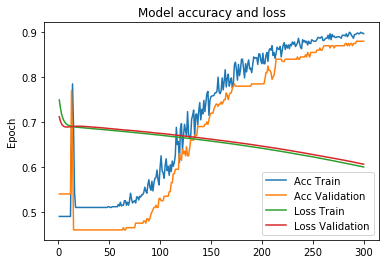

In [275]:
##PRUEBA CON LEARNING RATE 0.01
model = Sequential()
model.add(Dense(units=8, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss = 'binary_crossentropy', metrics=['accuracy'])
graph = model.fit(X_train, y_train, epochs=300, verbose=0, validation_data=(x_val, y_val))

epoch_range = range(1,301)
plt.plot(epoch_range, graph.history['accuracy'])
plt.plot(epoch_range, graph.history['val_accuracy'])
plt.plot(epoch_range, graph.history['loss'])
plt.plot(epoch_range, graph.history['val_loss'])
plt.title('Model accuracy and loss')
plt.ylabel('Epoch')
plt.legend(['Acc Train', 'Acc Validation','Loss Train', 'Loss Validation'], loc='left')
plt.show()

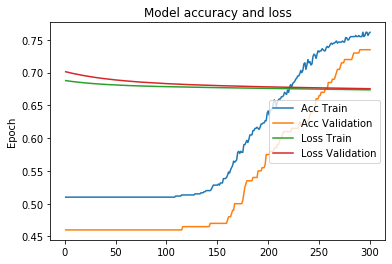

In [366]:
##PRUEBA CON LEARNING RATE 0.001
model = Sequential()
model.add(Dense(units=8, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])
graph = model.fit(X_train, y_train, epochs=300, verbose=0, validation_data=(x_val, y_val))

epoch_range = range(1,301)
plt.plot(epoch_range, graph.history['accuracy'])
plt.plot(epoch_range, graph.history['val_accuracy'])
plt.plot(epoch_range, graph.history['loss'])
plt.plot(epoch_range, graph.history['val_loss'])
plt.title('Model accuracy and loss')
plt.ylabel('Epoch')
plt.legend(['Acc Train', 'Acc Validation','Loss Train', 'Loss Validation'], loc='right')
plt.show()

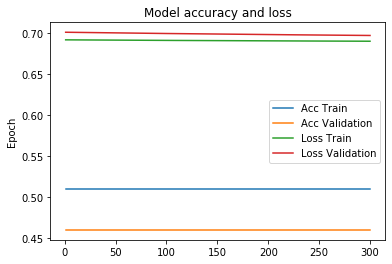

In [278]:
##PRUEBA CON LEARNING RATE 0.0001
model = Sequential()
model.add(Dense(units=8, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
graph = model.fit(X_train, y_train, epochs=300, verbose=0, validation_data=(x_val, y_val))

epoch_range = range(1,301)
plt.plot(epoch_range, graph.history['accuracy'])
plt.plot(epoch_range, graph.history['val_accuracy'])
plt.plot(epoch_range, graph.history['loss'])
plt.plot(epoch_range, graph.history['val_loss'])
plt.title('Model accuracy and loss')
plt.ylabel('Epoch')
plt.legend(['Acc Train', 'Acc Validation','Loss Train', 'Loss Validation'], loc='right')
plt.show()

### Finalmente luego de probar las diferentes alternativas con sus respectivos learning rates, se pudo observar que:
Con los learning rate 1 y 0.1 para 300 epochs, la convergencia de LOSS a 0 fue muy rapida
Con los learning rate 0.001 e inferiores para 300 epochs, la convergencia no se dió.
Por lo tanto, la mejor solución para este modelo es el learning rate de 0.001, ya que su convergencia se dió casi en las ultimas iteraciones.

## Pregunta 2: Entendiendo las operaciones convolucionales

En este apartado vamos a investigar de manera gráfica cuál es el resultado de una operación de convolución, que corresponde a la capacidad de una red convolucional de generar representaciones a partir de una imágen.

<img src="images/cute_cat.jpeg" alt="drawing" width="400"/>

2.1 Cargue a imagen anterior como una matriz NumPy. Luego normalice la imagen de tal forma que sus valores estén dentro del rango [-0.5, 0.5]

(3 pts.)

(463, 564, 3)


(463, 564, 3)

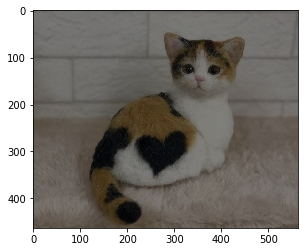

In [474]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

image = io.imread("cute_cat.jpeg")
image = (image/255)/2
print(image.shape)
plt.imshow(image)
image.shape

2.2 Elija dos kernel de tamaño 3x3 (ej. border detection, sharpen, box blur kernels, etc. Estos los puede encontrar [acá](https://en.wikipedia.org/wiki/Kernel_(image_processing))) y convolucione la imagen con cada uno de ellos. Para esto puede ocupar su propia función de convolución o utilzar la función [scipy.ndimage.filters.convolve](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.filters.convolve.html), utiizando borde constante.

(6 pts.)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
(463, 564, 3)


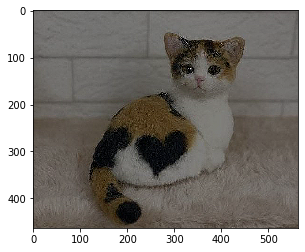

In [551]:
# import scipy
from scipy import ndimage
sharpen = np.array([[0, -1, 0],
                    [-1, 5,-1],
                    [0, -1, 0]])


image_sharpen_layer1 = scipy.ndimage.filters.convolve(image[:,:,0], sharpen, mode='constant', cval=0.0)
image_sharpen_layer2 = scipy.ndimage.filters.convolve(image[:,:,1], sharpen, mode='constant', cval=0.0)
image_sharpen_layer3 = scipy.ndimage.filters.convolve(image[:,:,2], sharpen, mode='constant', cval=0.0)


convolucion1 = np.copy(image)
convolucion1[:,:,0] = image_sharpen_layer1
convolucion1[:,:,1] = image_sharpen_layer2
convolucion1[:,:,2] = image_sharpen_layer3

print(convolucion1.shape)
plt.imshow(convolucion1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
(463, 564, 3)


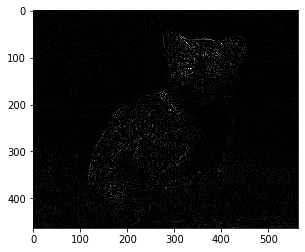

In [553]:
from scipy import ndimage
edge_detection = np.array([[-1, -1, -1],
                           [-1,  8, -1],
                           [-1, -1, -1]])

image_edge_detection_layer1 = scipy.ndimage.filters.convolve(image[:,:,0], edge_detection, mode='constant', cval=0.0)
image_edge_detection_layer2 = scipy.ndimage.filters.convolve(image[:,:,1], edge_detection, mode='constant', cval=0.0)
image_edge_detection_layer3 = scipy.ndimage.filters.convolve(image[:,:,2], edge_detection, mode='constant', cval=0.0)

convolucion2 = np.copy(image)
convolucion2[:,:,0] = image_edge_detection_layer1
convolucion2[:,:,1] = image_edge_detection_layer2
convolucion2[:,:,2] = image_edge_detection_layer3

print(convolucion2.shape)
plt.imshow(convolucion2)

2.3 Una vez convolucionada la imagen, convierta a cero los valores menores a cero. Para esto puede usar la función [np.clip](https://numpy.org/doc/1.18/reference/generated/numpy.clip.html). En otras palabras:
```
if x < 0:
    x = 0
else:
    x = x

```
(2 pts)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


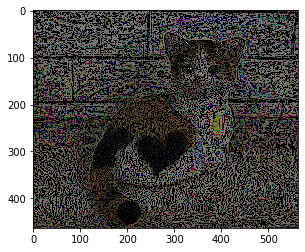

In [555]:
convolucion1[convolucion1<0] = 0 #Convertir todos los valores <0 en 0 en convolucion1
plt.imshow(convolucion1)

2.4 Implemente por su cuenta la operación de agregación estadística Max-Pooling. Para esto utilice kernel_size=4 y stride=4.

(6 pts.)

In [584]:
##Esta función es del siguiente link
##https://towardsdatascience.com/building-convolutional-neural-network-using-numpy-from-scratch-b30aac50e50a

import numpy as numpy

def pooling(feature_map, size=2, stride=2):
    #Preparing the output of the pooling operation.
    pool_out = numpy.zeros((numpy.uint16((feature_map.shape[0]-size+1)/stride),
                            numpy.uint16((feature_map.shape[1]-size+1)/stride),
                            feature_map.shape[-1]))
    for map_num in range(feature_map.shape[-1]):
        r2 = 0
        for r in numpy.arange(0,feature_map.shape[0]-size-1, stride):
            c2 = 0
            for c in numpy.arange(0, feature_map.shape[1]-size-1, stride):
                pool_out[r2, c2, map_num] = numpy.max([feature_map[r:r+size,  c:c+size, map_num]])
                c2 = c2 + 1
            r2 = r2 +1
    return pool_out

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


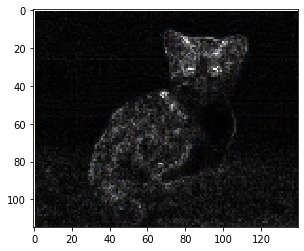

In [592]:
image_pooling = pooling(convolucion2, size=4, stride=4)
image_pooling.shape
plt.imshow(image_pooling)

2.5 Muestre los resultados de las operaciones realizadas. ¿Qué puede decir acerca de ellos? ¿Cómo cree que estas operaciones pueden ser de utilidad para una red neuronal a la hora de realizar una tarea de clasificación?

(3 pts.)

In [1]:
##Las convoluciones permiten extraer ciertas caracteristicas de una imagen dependiendo del tipo de kernel utilizado, es por esto que dependiendo de las caracteristicas identificadas por cada filtro, permitirá a nuestra CNN clasificar de mejor manera.

# Pregunta 3: Construyendo una Red Convolucional

The Street View House Numbers ([SVHN](http://ufldl.stanford.edu/housenumbers/)) [1] es un conocido dataset, comunmente utilizado como benchmark para probar y comparar modelos de Machine Learning. Este dataset contiene imágenes de números de casa vistos desde la calle, los cuales se encuentran etiquetados y dicha etiqueta se asocia al dígito que se encuentra al centro de la imagen.

<img src="images/svhn.png" alt="drawing" width="400"/>


Los datos se encuentran públicamente disponibles a continuación:
1. [train set](http://ufldl.stanford.edu/housenumbers/train_32x32.mat)
2. [test set](http://ufldl.stanford.edu/housenumbers/test_32x32.mat)


[1] Netzer, Y., Wang, T., Coates, A., Bissacco, A., Wu, B., Y Ng, A.: Reading Digits in Natural Images with Unsupervised Feature Learning. NIPS (2011)

3.1 Cargue las imagenes y etiquetas del set de entrenamiento y test como matrices NumPy. Las etiquetas van del número del '1' al '10', donde la décima etiqueta se asocia al valor 0. Cambie el valor de la etiqueta '10', para que cada etiqueta quede asociada al dígito que representa. Finalmente, grafique 9 imágenes del conjunto de entrenamiento.

(3 pts.)

In [446]:
##Algunas ideas fueron sacadas de aquí
#https://www.tensorflow.org/tutorials/keras/classification?hl=es

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
print(tf.__version__)

#Cargando el dataset
from scipy.io import loadmat
train_set = loadmat('train_32x32.mat')
test_set = loadmat('test_32x32.mat')
x_train = train_set['X']
y_train = train_set['y']
x_test = test_set['X']
y_test = test_set['y']

#Reordenamos los shapes 
x_train = x_train.transpose((3, 0, 1, 2))
x_test = x_test.transpose((3, 0, 1, 2))

#Contando cantidad de etiquetas con el valor 10 
print(y_train[y_train==10].shape)
print(y_test[y_test==10].shape)

#Cambiando las etiquetas 10 por 0
y_train[y_train==10] = 0
y_test[y_test==10] = 0

#Revisando si se cargaron correctamente
print(y_train[y_train==0].shape)
print(y_test[y_test==0].shape)

#
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

2.1.0
(4948,)
(1744,)
(4948,)
(1744,)
(73257, 32, 32, 3)
(73257, 1)
(26032, 32, 32, 3)
(26032, 1)


33746


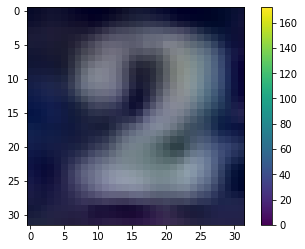

In [559]:
import random
i= random.randint(0,73256)
print(i)

plt.figure()
plt.imshow(x_train[i])
plt.colorbar()
plt.grid(False)
plt.show()

3.2 Para terminar el preprocesamiento de los datos, se pide que las etiquetas se presenten como variables categóricas. Esto es, para la etiqueta: 
```
0 = [1, 0, ... , 0]
1 = [0, 1, ... , 0]
...
N = [0, 0, ... , 1]
```
Además, se pide seleccionar un conjunto de validación para poder monitorear el sobreajuste del modelo sobre los datos de entrenamiento. Se pide que un 20% de los datos de entrenamiento sean utilizados para validación.

(3 pts.)

In [448]:
import pandas as pd
y_test_1 = y_test[:,0]
y_train_1 = y_train[:,0]
print(y_test_1)
print(y_train_1)

[5 2 1 ... 7 6 7]
[1 9 2 ... 1 6 9]


In [449]:
y_test_dummy = pd.get_dummies(y_test_1, prefix="Number")
y_train_dummy = pd.get_dummies(y_train_1, prefix="Number")
print(y_train_dummy.shape)
print(y_test_dummy.shape)
y_train_dummy.tail()
y_test = y_test_dummy

(73257, 10)
(26032, 10)


In [450]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train_dummy, test_size=0.2, random_state = 0)

In [451]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(58605, 32, 32, 3)
(58605, 10)
(14652, 32, 32, 3)
(14652, 10)
(26032, 32, 32, 3)
(26032, 10)


3.3 Para construir red convolucional, se utilizará una modificación la famosa arquitectura arquitectura AlexNet, propuesta por Alex Krizhevsky [2] [(lectura obligatoria)](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf).

Se pide especificamente construir una red convoucional con la siguiente arquitectura:

| Layer  | Operation|  Kernel |  Stride |  Activation | Maxpooling (stride) | Dropout (prob) |
|---|---|---|---|---|---|---|
|  1 | Convolución (32)  |  (3,3) |  1 |  ReLU |  No | No |
|  2 |  Convolución (32) | (3,3)  |  1 | ReLU  |  Yes (2,2) | No |
|  3 |  Convolución (64) | (3,3)  |  1 | ReLU  |  No | No |
|  4 |  Convolución (64) | (3,3)  |  1 | ReLU  |  Yes (2,2) | Yes(0.25) |
|  5 |  Densa (512) | -  | - | ReLU  | No | Yes(0.5) |
|  5 |  Densa (10) | -  | - | Softmax  | No | No |


Calcule el número de parámetros a dicha arquitectura.

[2] Krizhevsky, A., Sutskever, I., Hinton, G.: ImageNet Classification with Deep Convolutional Neural Networks. NIPS (2012)

(8 pts.)

In [468]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
print(tf.__version__)


model2 = Sequential()
model2.add(Conv2D(filters=32, strides=1, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model2.add(Conv2D(filters=32, strides=1, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Conv2D(filters=64, strides=1, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(Conv2D(filters=64, strides=1, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))
#compiling the model
model2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

2.1.0
Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_118 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_69 (Dropout)         (None, 8, 8, 64)  

3.4 Entrene esta red neuronal utilizando la función de costos correspondiente y las siguientes consideraciones:

1. Optimizador Adam (lr=0.0001)
2. batch size = 64 
3. Número de epocas = 10

**OBS: debe tener en cuenta que el proceso de entrenamiento CPU puede demorar algunas horas. Si dispone de GPU (o utiliza coblab), puede acelerar este proceso y demorarse incluso minutos**

(3 pts.)

In [469]:
graph2 = model2.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_val,y_val))

Train on 58605 samples, validate on 14652 samples
Epoch 1/10
58605/58605 [==============================] - 38s 655us/sample - loss: 2.6618 - accuracy: 0.2699 - val_loss: 1.1758 - val_accuracy: 0.6642
Epoch 2/10
58605/58605 [==============================] - 37s 629us/sample - loss: 0.9768 - accuracy: 0.6909 - val_loss: 0.5647 - val_accuracy: 0.8432
Epoch 3/10
58605/58605 [==============================] - 37s 628us/sample - loss: 0.6601 - accuracy: 0.8010 - val_loss: 0.4670 - val_accuracy: 0.8759
Epoch 4/10
58605/58605 [==============================] - 37s 636us/sample - loss: 0.5567 - accuracy: 0.8323 - val_loss: 0.4232 - val_accuracy: 0.8827
Epoch 5/10
58605/58605 [==============================] - 37s 628us/sample - loss: 0.4931 - accuracy: 0.8521 - val_loss: 0.3923 - val_accuracy: 0.8941
Epoch 6/10
58605/58605 [==============================] - 37s 629us/sample - loss: 0.4439 - accuracy: 0.8669 - val_loss: 0.3612 - val_accuracy: 0.9021
Epoch 7/10
58605/58605 [====================

3.5 Grafique dos curvas de aprendizaje, donde en el eje x se muestre el número de épocas y en el eje y se muestre la función de pérdida / accuracy respectivamente. Este gráfico debe contener los valores para el conjunto de entrenamiento, validación y el resultado final medido sobre el conjunto de test.

(3 pts.)

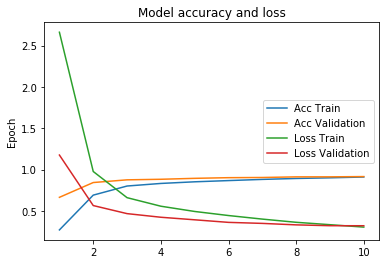

In [470]:
epoch_range = range(1,11)
plt.plot(epoch_range, graph2.history['accuracy'])
plt.plot(epoch_range, graph2.history['val_accuracy'])
plt.plot(epoch_range, graph2.history['loss'])
plt.plot(epoch_range, graph2.history['val_loss'])
plt.title('Model accuracy and loss')
plt.ylabel('Epoch')
plt.legend(['Acc Train', 'Acc Validation','Loss Train', 'Loss Validation'], loc='right')
plt.show()